## **Implementasi Algoritma Particle Swarm Optimization (PSO) di Python**

Tujuan atau goal kita adalah untuk menemukan titik minimum dari fungsi tertentu. Dalam hal ini, fungsinya adalah f(x,y) = x² + y² + 1. Dengan demikian, algoritma akan bekerja dengan array posisi 2 dimensi dan nilai fitnessnya adalah koordinat Z. Maka kita tahu bahwa target kita adalah menemukan koordinat [0,0] yang merupakan minimum dari f(x,y).

Untuk mengimplementasikan algoritma dalam python digunakan OOP. Mula-mula inisialisasi library numpy untuk menangani operasi array setelah kita bekerja dengan ruang multidimensi.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# **Kelas Particle**

Kelas Partikel terdiri dari 3 metode:
1.   Init : Ketika Partikel dimulai secara otomatis, kita mengurutkan 2 posisi terbatas dalam kisaran -50 hingga +50. Pbest_position (yang merupakan posisi individu terbaik dari partikel itu) dimulai dengan posisi awal. Dan saat kita mencari nilai minimum, pbest_value dimulai dengan +inf (bisa berupa nilai yang lebih besar).
2.   Str (cetak string): metode __str__() hanya untuk mencetak posisi aktual dan nilai individual terbaik. 
1.  Metode move() menambahkan vektor posisi dan kecepatan dimensi yang dihitung
dalam pencarian seperti yang akan kita lihat di depan

In [2]:
class Particle():
    def __init__(self):
        self.position = np.array([(-1) ** (bool(random.getrandbits(1))) * random.random()*50, (-1)**(bool(random.getrandbits(1))) * random.random()*50])
        self.pbest_position = self.position
        self.pbest_value = float('inf')
        self.velocity = np.array([0,0])

    def __str__(self):
        print("Posisi ", self.position, " pbest : ", self.pbest_position)
    
    def move(self):
        self.position = self.position + self.velocity

# **Kelas** **Search Space** 

Search Space (Ruang Pencarian) adalah entitas yang mengontrol rutinitas algoritma. Dalam implementasi ini, bertanggung jawab untuk menjaga semua partikel, mengidentifikasi dan menetapkan nilai posisi terbaik individu dari semua partikel, mengelola kriteria kesalahan target, menghitung nilai global terbaik, dan menetapkan posisi global terbaik. 

Metode **set_pbset** dan **set_gbest** memiliki cara implementasi yang serupa. Mula-mula ia melewati semua partikel dan menghitung nilai fitness dari posisi partikel dan membandingkan dengan posisi individu terbaik (di **set_pbest**) dan posisi global terbaik (di **set_gbest**).

Dalam hal ini, fungsi fitness menghitung hasil f(x,y) = x² + y² + 1, dimana x = particle.position[0] dan y=particle.position[1]

Metode **move_particles** menghitung kecepatan vektor baru untuk setiap partikel di setiap dimensi seperti yang telah dijelaskan sebelumnya.

In [3]:
class Space():

    def __init__(self, target, target_error, n_particles):
        self.target = target
        self.target_error = target_error
        self.n_particles = n_particles
        self.particles = []
        self.gbest_value = float('inf')
        self.gbest_position = np.array([random.random()*50, random.random()*50])

    def print_particles(self):
        for particle in self.particles:
            particle.__str__()
   
    def fitness(self, particle): 
        return particle.position[0] ** 2 + particle.position[1] ** 2 + 1

    def set_pbest(self):
        for particle in self.particles:
            fitness_cadidate = self.fitness(particle)
            if(particle.pbest_value > fitness_cadidate):
                particle.pbest_value = fitness_cadidate
                particle.pbest_position = particle.position
            

    def set_gbest(self):
        for particle in self.particles:
            best_fitness_cadidate = self.fitness(particle)
            if(self.gbest_value > best_fitness_cadidate):
                self.gbest_value = best_fitness_cadidate
                self.gbest_position = particle.position

    def move_particles(self):
        for particle in self.particles:
            global W
            new_velocity = (W*particle.velocity) + (c1*random.random()) * (particle.pbest_position - particle.position) + \
                            (random.random()*c2) * (self.gbest_position - particle.position)
            particle.velocity = new_velocity
            particle.move()

## **Main loop**

Mula-mula dimulai Search Space dengan target 1. Target ini merepresentasikan target pada nilai fitness, artinya target adalah f(x,y) = 1. Algoritma kemudian akan mencari nilai x dan y yang memberikan hasil sama dengan 1 seperti yang ditunjukkan sebelumnya pada bentuk fungsi yang ingin kita cari minimum. Plot Kontur juga menunjukkan kepada kita bahwa nilai yang ingin kita cari adalah [0,0]. 

Jumlah Iterasi, Target error dan jumlah partikel (n_particles) diatur oleh pengguna. Kemudian dengan generator list memulai semua partikel dan setelah memulai iterasi.
Selanjutnya kita juga bisa menampilkan kurva error di setiap iterasi.

In [7]:
W = 0.5
c1 = 0.8
c2 = 0.9 

n_iterations = int(input("Jumlah iterasi: "))
target_error = float(input("target error: "))
n_particles = int(input("Jumlah partikel: "))

Posisi  [ 2.77655252 48.07697752]  pbest :  [ 2.77655252 48.07697752]
Posisi  [-39.42400297  30.11609291]  pbest :  [-39.42400297  30.11609291]
Posisi  [ -3.70071226 -24.15086651]  pbest :  [ -3.70071226 -24.15086651]
Posisi  [-0.54867671  4.06677285]  pbest :  [-0.54867671  4.06677285]
Posisi  [-3.38620556 35.2759639 ]  pbest :  [-3.38620556 35.2759639 ]
Posisi  [  8.74065503 -33.70855684]  pbest :  [  8.74065503 -33.70855684]
Posisi  [47.61026713  3.51857601]  pbest :  [47.61026713  3.51857601]
Posisi  [ 4.69262333 44.49076601]  pbest :  [ 4.69262333 44.49076601]
Posisi  [-7.71612446 -2.31597481]  pbest :  [-7.71612446 -2.31597481]
Posisi  [-2.63055763 44.99900192]  pbest :  [-2.63055763 44.99900192]
Posisi  [45.748635   46.86617385]  pbest :  [45.748635   46.86617385]
Posisi  [  6.0980876  -37.60581884]  pbest :  [  6.0980876  -37.60581884]
Posisi  [-7.74957101 47.3219677 ]  pbest :  [-7.74957101 47.3219677 ]
Posisi  [-13.71891903  39.69430279]  pbest :  [-13.71891903  39.69430279]


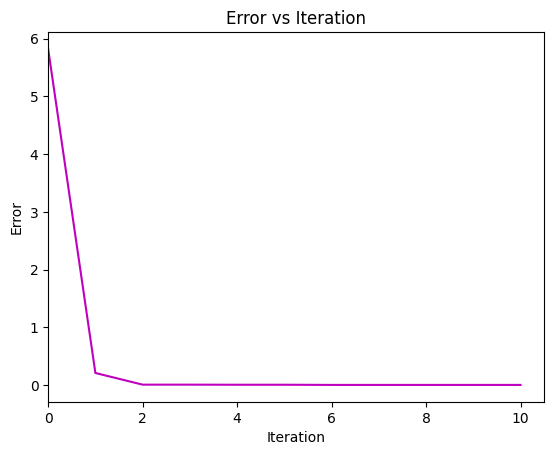

In [8]:
search_space = Space(1, target_error, n_particles)
particles_vector = [Particle() for _ in range(search_space.n_particles)]
search_space.particles = particles_vector
search_space.print_particles()

iteration = 0
error=[]
while(iteration < n_iterations):
    search_space.set_pbest()    
    search_space.set_gbest()
    error.append(abs(search_space.gbest_value - search_space.target)) #menyimpan error
    if(abs(search_space.gbest_value - search_space.target) <= search_space.target_error):
        break

    search_space.move_particles()
    iteration += 1
    
print("Solusi Terbaik (Best Solution): ", search_space.gbest_position, " dalam jumlah iterasi: ", iteration)

#plot kurva error vs iterasi
plt.plot(error, c='m')
plt.title('Error vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.xlim(0)
plt.show()